In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

import scipy as sp
from sklearn.linear_model import LinearRegression

pd.set_option("display.max_columns", 100)

import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats


In [2]:
df = pd.read_csv('Ames_HousePrice.csv')

In [3]:
df.describe()

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2580.000000,2.580000e+03,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2566.000000,2579.000000,2579.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2578.000000,2578.000000,2580.000000,2580.000000,2580.000000,2580.00000,2580.000000,2580.000000,2451.000000,2579.000000,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,436.480233,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,99.308262,444.346258,53.238852,539.101590,1036.686700,1144.975194,336.820155,4.244574,0.435221,0.062064,1.550775,0.378295,2.850388,1.04031,6.387209,0.604264,1976.982048,1.747577,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,258.829647,1.886626e+08,488.650181,75031.089374,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,175.872330,429.334957,174.423920,425.199639,418.555417,375.958955,424.072452,44.403603,0.518827,0.244513,0.545825,0.499237,0.822863,0.20255,1.535186,0.648604,24.659801,0.738678,207.476842,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,1.000000,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,215.750000,5.313630e+08,1112.000000,129975.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,215.000000,792.000000,871.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000,5.000000,0.000000,1960.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,430.500000,5.354546e+08,1436.000000,159900.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,384.000000,0.000000,448.000000,979.000000,1071.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.00000,6.000000,1.000000,1978.000000,2.000000,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,645.250000,9.071811e+08,1733.000000,209625.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,158.000000,732.000000,0.000000,784.000000,1266.500000,1364.000000,703.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.00000,7.000000,1.000000,2000.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1000.000000,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,1872.000000,1064.000000,3.000000,2.000000,4.000000,2.000000,6.000000,3.00000,13.000000,4.000000,2010.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


In [4]:
len(df.describe().columns)

39

In [6]:
numeric = df.select_dtypes('number')
numeric.head(3)

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,909176150,856,126000,30,NaN,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010
1,2,905476230,1049,139500,120,42.0,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009
2,3,911128020,1001,124900,30,60.0,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007


In [7]:
numeric.shape

(2580, 39)

In [11]:
base = numeric.dropna()
base.shape

(1988, 39)

In [15]:
y=base.SalePrice
x=base.drop('SalePrice', axis=1)

In [17]:
y.shape

(1988,)

In [16]:
x.shape

(1988, 38)

In [18]:
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [19]:
regressor.score(x,y)

0.8746769219771626

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

In [21]:
ols = LinearRegression()
ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.892278
--------------------------------------------------
R^2 for test  set: 0.819751


## StatsModels ##

In [26]:
# Obtain and set x=input and y=output
x0 = base.drop('SalePrice', axis=1)
y0 = base.SalePrice

In [27]:
x0.shape

(1988, 38)

In [28]:
y0.shape

(1988,)

In [29]:
#Setup statsmodels.api, inputs (x, x_constant, and y)
x_constant0 = sm.add_constant(x)

In [30]:
#Run OLS with statsmodels
lin_reg0 = sm.OLS(y0,x_constant0).fit()
lin_reg0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     378.2
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:47:50   Log-Likelihood:                -23154.
No. Observations:                1988   AIC:                         4.638e+04
Df Residuals:                    1951   BIC:                         4.659e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.933e+05   9.77e+05     -0.300      0.764   -2.21e+06    1.62e+06
Unnamed: 0       -0.4850      2.438     -0.199      0.842      -5.266       4.296
PID           -2.193e-06   3.72e-06     -0.590      0.555   -9.48e-06     5.1e-06
GrLivArea        40.5816      4.212      9.635      0.000      32.322      48.841
MSSubClass     -136.7991     19.544     -6.999      0.000    -175.129     -98.469
LotFrontage       3.6537     37.570      0.097      0.923     -70.028      77.335
LotArea           0.8386      0.110      7.598      0.000       0.622       1.055
OverallQual    1.576e+04    801.066     19.671      0.000    1.42e+04    1.73e+04
OverallCond    4597.6295    745.658      6.166      0.000    3135.259    6060.000
YearBuilt       304.1431     49.207      6.181      0.000     207.639     400.647
YearRemodAdd    211.8799     46.640      4.543      0.000     120.411     303.349
MasVnrArea       35.6569      4.184      8.522      0.000      27.451      43.863
BsmtFinSF1       20.3632      1.749     11.641      0.000      16.933      23.794
BsmtFinSF2        5.3225      2.916      1.826      0.068      -0.395      11.040
BsmtUnfSF        -2.6948      1.640     -1.644      0.100      -5.910       0.521
TotalBsmtSF      22.9910      2.327      9.881      0.000      18.428      27.554
1stFlrSF         16.1064      4.486      3.590      0.000       7.308      24.905
2ndFlrSF         20.2008      4.077      4.955      0.000      12.205      28.197
LowQualFinSF      4.2744     10.946      0.390      0.696     -17.194      25.742
BsmtFullBath   1755.0624   1802.735      0.974      0.330   -1780.426    5290.551
BsmtHalfBath  -2480.4729   2840.153     -0.873      0.383   -8050.525    3089.580
FullBath      -2042.1566   1960.791     -1.041      0.298   -5887.622    1803.309
HalfBath       -154.9613   1917.145     -0.081      0.936   -3914.829    3604.907
BedroomAbvGr   -1.09e+04   1219.270     -8.939      0.000   -1.33e+04   -8508.275
KitchenAbvGr  -1.626e+04   4233.437     -3.840      0.000   -2.46e+04   -7955.397
TotRmsAbvGrd   2762.7041    871.816      3.169      0.002    1052.916    4472.492
Fireplaces     3746.8325   1218.188      3.076      0.002    1357.745    6135.920
GarageYrBlt       6.5732     51.802      0.127      0.899     -95.021     108.167
GarageCars     2788.9532   2050.522      1.360      0.174   -1232.492    6810.398
GarageArea       36.6396      7.122      5.145      0.000      22.672      50.607
WoodDeckSF       13.7795      5.561      2.478      0.013       2.874      24.685
OpenPorchSF     -15.2314     10.930     -1.394      0.164     -36.667       6.204
EnclosedPorch    14.1362     10.883      1.299      0.194      -7.207      35.480
3SsnPorch        12.8333     25.267      0.508      0.612     -36.721      62.387
ScreenPorch      44.3359     11.166      3.970   

<AxesSubplot:>

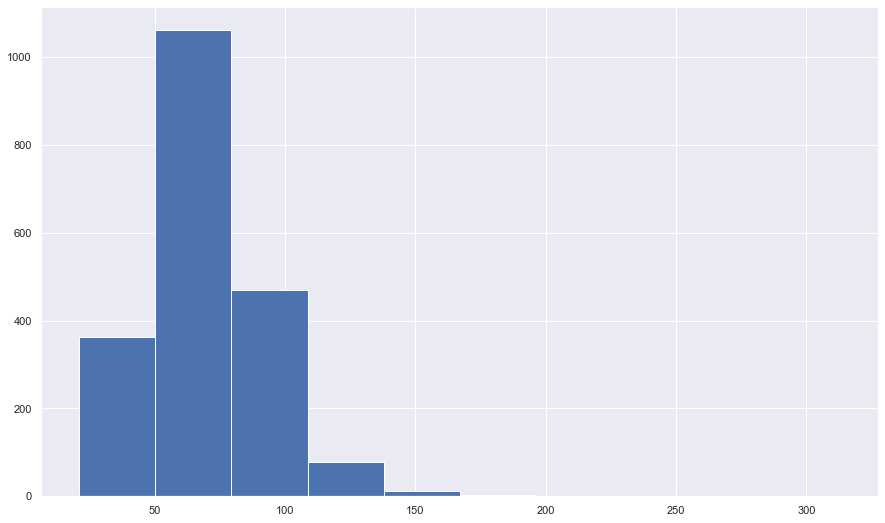

In [31]:
base.LotFrontage.hist()

In [34]:
base.LotFrontage.describe()

count    1988.000000
mean       69.018612
std        22.840890
min        21.000000
25%        59.000000
50%        68.500000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [36]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

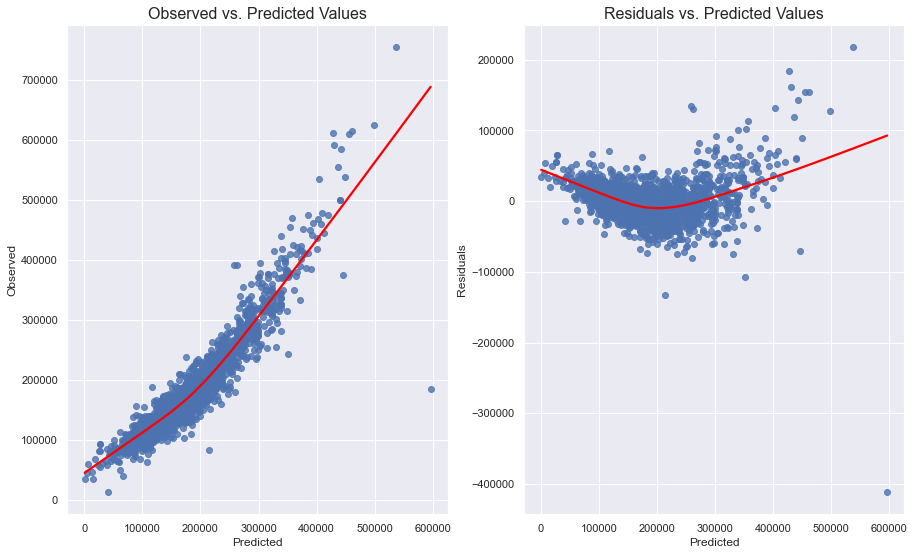

In [38]:
#Run Linearity Test for Assumption #1

import seaborn as sns 
import matplotlib.pyplot as plt

#import statsmodels.stats.api as sms

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

linearity_test(lin_reg0, y0)

In [39]:
#Check Assumption 2: Is expected (mean) value of residuals = 0? 
lin_reg0.resid.mean()

-1.0675729474453798e-06

In [40]:
#Check Assumption 3: Are errors independent? 
import statsmodels
statsmodels.stats.stattools.durbin_watson(lin_reg0.resid)

2.036171217903958

In [41]:
#Check Assumption 4: Normality of Residuals
from scipy import stats
import statsmodels.api as sm

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    


Jarque-Bera test ---- statistic: 75611.2720, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.8612, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5241, p-value: 0.0000
Anderson-Darling test ---- statistic: 29.5214, 5% critical value: 0.7850
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


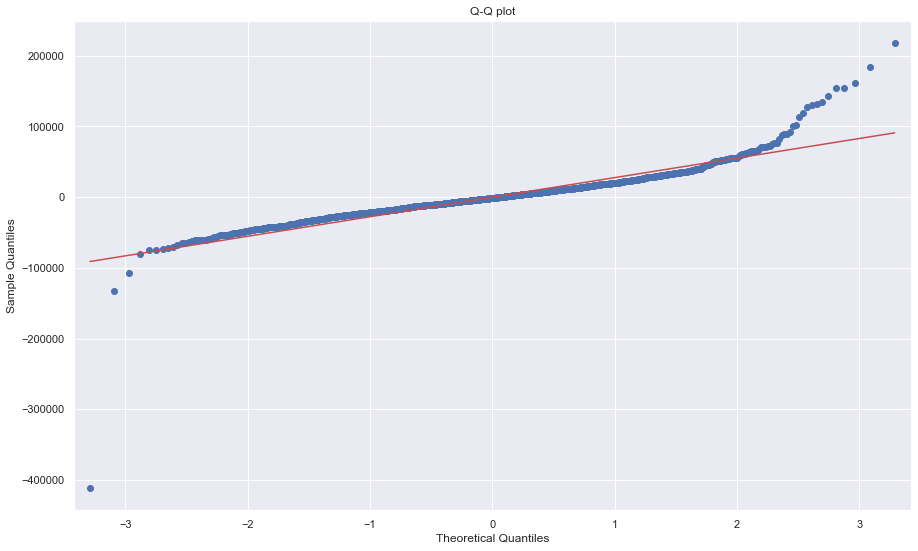

In [42]:
normality_of_residuals_test(lin_reg0)